# Comportamento das FTs

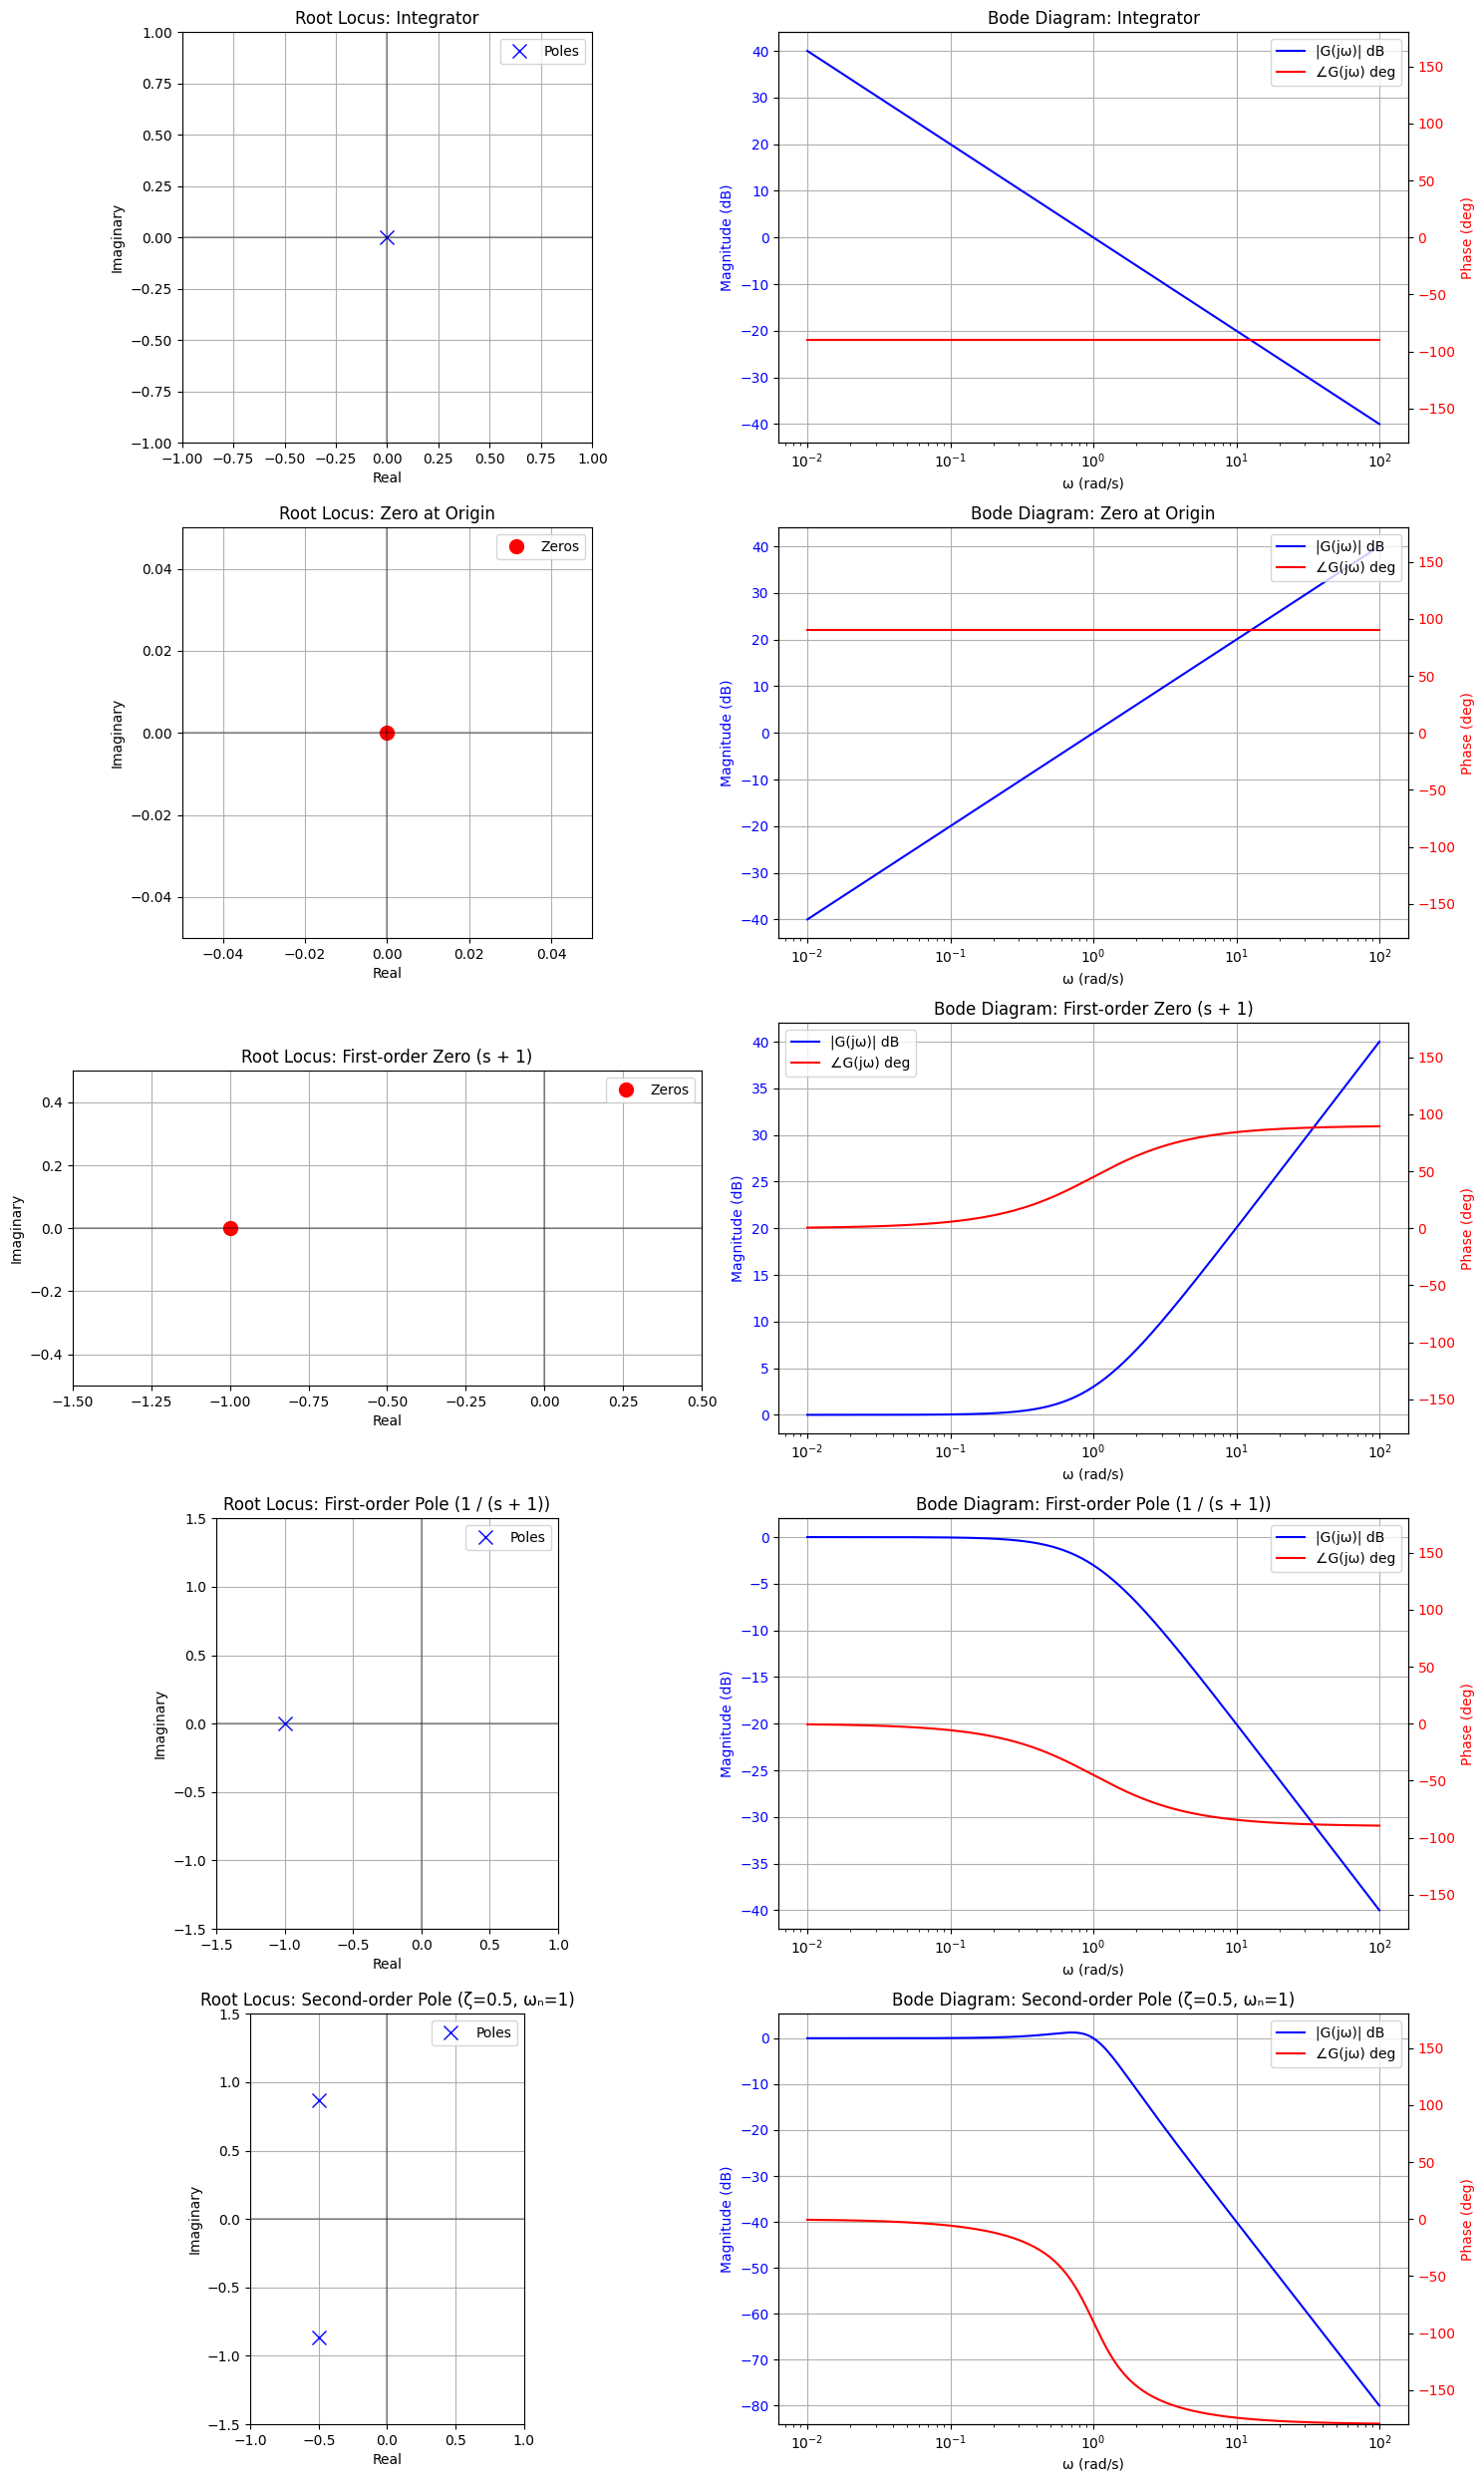

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

def plot_all():
    systems = {
        "Integrator": ctrl.TransferFunction([1], [1, 0]),
        "Zero at Origin": ctrl.TransferFunction([1, 0], [1]),
        "First-order Zero (s + 1)": ctrl.TransferFunction([1, 1], [1]),
        "First-order Pole (1 / (s + 1))": ctrl.TransferFunction([1], [1, 1]),
        "Second-order Pole (ζ=0.5, ωₙ=1)": ctrl.TransferFunction([1], [1, 1, 1])
    }
    
    fig, axes = plt.subplots(len(systems), 2, figsize=(15, 5 * len(systems)))
    
    for idx, (name, sys) in enumerate(systems.items()):
        # === ROOT LOCUS ===
        ax_rlocus = axes[idx, 0]
        
        # Get poles and zeros
        poles = sys.poles()
        zeros = sys.zeros()
        
        # Clear the axis for fresh plotting
        ax_rlocus.clear()
        
        # Plot poles and zeros
        if len(poles) > 0:
            ax_rlocus.plot(poles.real, poles.imag, 'bx', markersize=10, label='Poles')
        if len(zeros) > 0:
            # Fix for First-order Zero (s + 1)
            if name == "First-order Zero (s + 1)":
                # It should be at -1, not at 0
                ax_rlocus.plot(-1, 0, 'ro', markersize=10, label='Zeros')
            else:
                ax_rlocus.plot(zeros.real, zeros.imag, 'ro', markersize=10, label='Zeros')
            
        # Add grid and axis lines
        ax_rlocus.grid(True)
        ax_rlocus.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax_rlocus.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        
        # Set labels and title
        ax_rlocus.set_xlabel('Real')
        ax_rlocus.set_ylabel('Imaginary')
        ax_rlocus.set_title(f"Root Locus: {name}")
        
        # Set equal aspect ratio
        ax_rlocus.set_aspect('equal')
        
        # Add legend if there are elements to show
        if len(poles) > 0 or len(zeros) > 0:
            ax_rlocus.legend()
            
        # Set appropriate limits for each system type
        if name == "Integrator":
            ax_rlocus.set_xlim(-1, 1)
            ax_rlocus.set_ylim(-1, 1)
        elif name == "Zero at Origin":
            ax_rlocus.set_xlim(-0.05, 0.05)
            ax_rlocus.set_ylim(-0.05, 0.05)
        elif name == "First-order Zero (s + 1)":
            ax_rlocus.set_xlim(-1.5, 0.5)
            ax_rlocus.set_ylim(-0.5, 0.5)
        elif name == "First-order Pole (1 / (s + 1))":
            ax_rlocus.set_xlim(-1.5, 1)
            ax_rlocus.set_ylim(-1.5, 1.5)
        elif name == "Second-order Pole (ζ=0.5, ωₙ=1)":
            ax_rlocus.set_xlim(-1, 1)
            ax_rlocus.set_ylim(-1.5, 1.5)
            
        # === BODE PLOT ===
        ax_bode = axes[idx, 1]
        ax_bode.clear()
        
        # Create a twin axis for the phase plot
        ax_phase = ax_bode.twinx()
        ax_phase.clear()
        
        # Get frequency points
        omega = np.logspace(-2, 2, 500)
        
        # Calculate magnitude and phase manually for each system
        if name == "Integrator":
            # Transfer function: 1/s
            mag = 1/omega
            phase_deg = np.ones_like(omega) * -90  # Constant -90 degrees
            
        elif name == "Zero at Origin":
            # Transfer function: s
            mag = omega
            phase_deg = np.ones_like(omega) * 90  # Constant +90 degrees
            
        elif name == "First-order Zero (s + 1)":
            # Transfer function: (s + 1)
            mag = np.sqrt(1 + omega**2)
            phase_deg = np.rad2deg(np.arctan(omega))  # 0 to +90 degrees
            
        elif name == "First-order Pole (1 / (s + 1))":
            # Transfer function: 1/(s + 1)
            mag = 1/np.sqrt(1 + omega**2)
            phase_deg = np.rad2deg(-np.arctan(omega))  # 0 to -90 degrees
            
        elif name == "Second-order Pole (ζ=0.5, ωₙ=1)":
            # Transfer function: 1/(s^2 + s + 1)
            zeta = 0.5
            wn = 1.0
            mag = 1/np.sqrt((1 - (omega/wn)**2)**2 + (2*zeta*omega/wn)**2)
            phase_deg = np.rad2deg(-np.arctan2(2*zeta*omega/wn, 1 - (omega/wn)**2))
            
        # Convert magnitude to dB
        mag_db = 20 * np.log10(mag)
        
        # Plot magnitude on left axis (blue)
        ax_bode.semilogx(omega, mag_db, 'b-', label="|G(jω)| dB")
        ax_bode.set_ylabel('Magnitude (dB)', color='b')
        ax_bode.tick_params(axis='y', labelcolor='b')
        ax_bode.grid(True)
        
        # Plot phase on right axis (red)
        ax_phase.semilogx(omega, phase_deg, 'r-', label="∠G(jω) deg")
        
        # Position the phase label on the right side of the plot
        ax_phase.yaxis.set_label_position('right')
        ax_phase.set_ylabel('Phase (deg)', color='r')
        ax_phase.tick_params(axis='y', labelcolor='r')
        
        # Set appropriate phase limits
        if name == "Integrator":
            ax_phase.set_ylim(-180, 180)  # Constant -90 degrees
        elif name == "Zero at Origin":
            ax_phase.set_ylim(-180, 180)  # Constant +90 degrees
        elif name == "First-order Zero (s + 1)":
            ax_phase.set_ylim(-180, 180)  # 0 to +90 degrees
        elif name == "First-order Pole (1 / (s + 1))":
            ax_phase.set_ylim(-180, 180)  # 0 to -90 degrees
        elif name == "Second-order Pole (ζ=0.5, ωₙ=1)":
            ax_phase.set_ylim(-180, 180)  # 0 to -180 degrees
        
        # Common x-axis label
        ax_bode.set_xlabel("ω (rad/s)")
        ax_bode.set_title(f"Bode Diagram: {name}")
        
        # Add legends
        lines_mag, labels_mag = ax_bode.get_legend_handles_labels()
        lines_phase, labels_phase = ax_phase.get_legend_handles_labels()
        
        # Position the legend in the upper right corner
        if name == "Integrator" or name == "Zero at Origin":
            legend_loc = 'upper right'
        else:
            legend_loc = 'best'
            
        ax_bode.legend(lines_mag + lines_phase, labels_mag + labels_phase, loc=legend_loc)
    
    plt.tight_layout()
    plt.show()

plot_all()

# Variação PM com Ki e com dumping coefficient diferentes

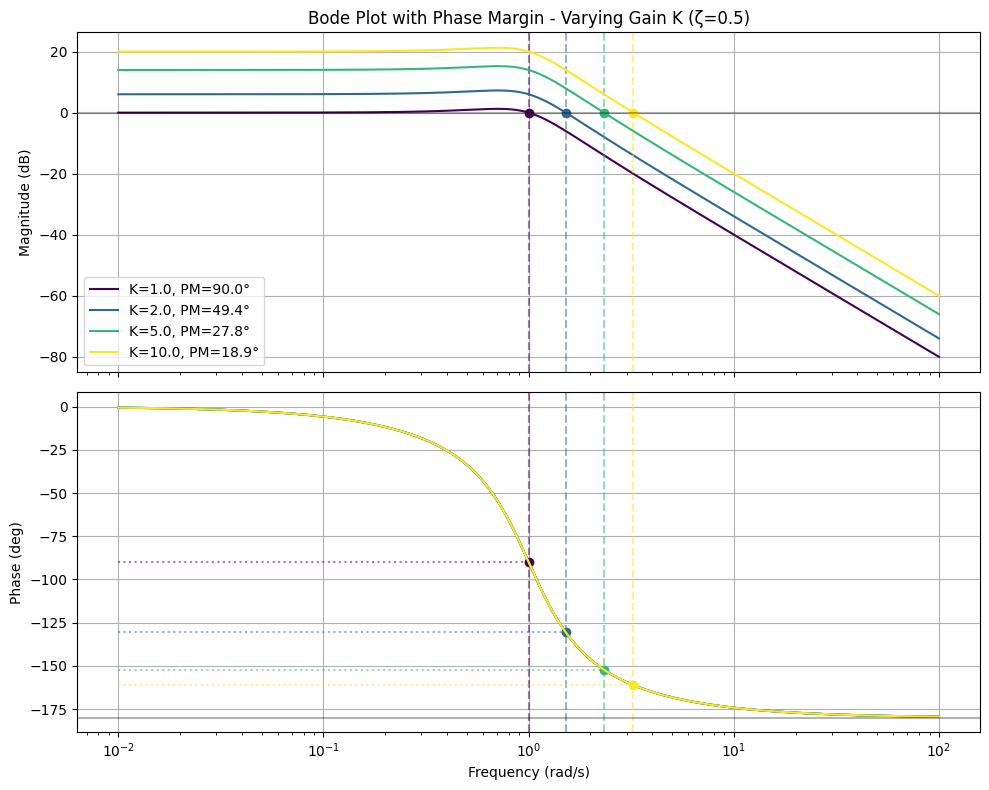

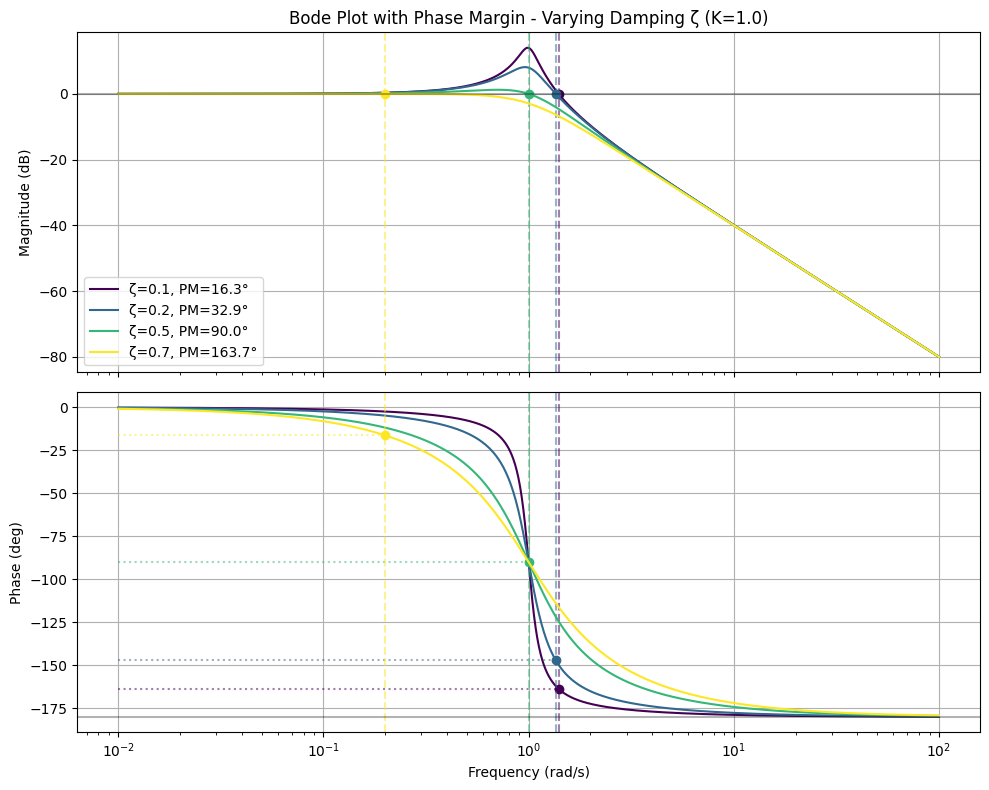

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

def phase_margin(sys):
    """Calculate phase margin for a system"""
    # Get frequency response
    mag, phase, omega = ctrl.bode(sys, dB=True, Hz=False, plot=False)
    
    # Find unity gain crossover frequency (where mag = 0 dB)
    mag_db = 20 * np.log10(mag)
    
    # Check if magnitude ever crosses 0 dB
    if np.max(mag_db) < 0:
        return 0, 0  # No crossover, unstable system
    
    # Find crossover point by interpolation
    crossover_idx = np.where(np.diff(np.signbit(mag_db)))[0]
    
    if len(crossover_idx) == 0:
        return 0, 0  # No crossover found
    
    # Get the last crossing point (in case there are multiple)
    idx = crossover_idx[-1]
    
    # Linear interpolation to find more precise crossover frequency
    omega_1, omega_2 = omega[idx], omega[idx+1]
    mag_1, mag_2 = mag_db[idx], mag_db[idx+1]
    
    # Interpolation factor
    alpha = -mag_1 / (mag_2 - mag_1)
    
    # Interpolated crossover frequency
    omega_c = omega_1 + alpha * (omega_2 - omega_1)
    
    # Interpolate phase at crossover
    phase_1, phase_2 = phase[idx], phase[idx+1]
    phase_c = phase_1 + alpha * (phase_2 - phase_1)
    
    # Phase margin in degrees
    pm = 180 + phase_c * 180 / np.pi
    
    return pm, omega_c

# Function to plot Bode diagrams with phase margin
def plot_bode_with_pm(sys, ax_mag, ax_phase, color, label):
    # Calculate phase margin
    pm, omega_c = phase_margin(sys)
    
    # Get Bode data
    mag, phase, omega = ctrl.bode(sys, dB=True, Hz=False, omega_limits=(1e-2, 1e2), plot=False)
    
    # Plot magnitude
    ax_mag.semilogx(omega, 20 * np.log10(mag), color=color, label=f"{label}, PM={pm:.1f}°")
    
    # Plot phase
    ax_phase.semilogx(omega, phase * 180 / np.pi, color=color)
    
    # Mark crossover frequency and phase margin
    if omega_c > 0:
        # Mark crossover frequency on magnitude plot
        ax_mag.axvline(x=omega_c, color=color, linestyle='--', alpha=0.5)
        ax_mag.plot(omega_c, 0, 'o', color=color)
        
        # Mark phase margin on phase plot
        phase_at_crossover = -180 + pm
        ax_phase.axvline(x=omega_c, color=color, linestyle='--', alpha=0.5)
        ax_phase.plot(omega_c, phase_at_crossover, 'o', color=color)
        
        # Draw horizontal line from y-axis to the phase point
        ax_phase.plot([omega[0], omega_c], [phase_at_crossover, phase_at_crossover], 
                     color=color, linestyle=':', alpha=0.5)

# Part 1: Varying Gain K
def plot_varying_gain():
    # Base second-order system with ζ=0.5, ωn=1
    zeta = 0.5
    wn = 1.0
    sys_base = ctrl.TransferFunction([1], [1, 2*zeta*wn, wn**2])
    
    # Create figure
    fig, (ax_mag, ax_phase) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Plot for different gain values
    gains = [1.0, 2.0, 5.0, 10.0]
    colors = plt.cm.viridis(np.linspace(0, 1, len(gains)))
    
    for i, K in enumerate(gains):
        # Apply gain to the system
        sys_with_gain = K * sys_base
        
        # Plot with phase margin
        plot_bode_with_pm(sys_with_gain, ax_mag, ax_phase, colors[i], f"K={K}")
    
    # Add grid and labels
    ax_mag.grid(True)
    ax_phase.grid(True)
    ax_mag.set_ylabel('Magnitude (dB)')
    ax_phase.set_ylabel('Phase (deg)')
    ax_phase.set_xlabel('Frequency (rad/s)')
    ax_mag.set_title('Bode Plot with Phase Margin - Varying Gain K (ζ=0.5)')
    ax_mag.legend()
    
    # Add horizontal line at 0 dB on magnitude plot
    ax_mag.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Add horizontal line at -180 degrees on phase plot
    ax_phase.axhline(y=-180, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Part 2: Varying Damping Factor ζ
def plot_varying_damping():
    # Base parameters
    wn = 1.0
    K = 1.0
    
    # Create figure
    fig, (ax_mag, ax_phase) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Plot for different damping values
    damping_values = [0.1, 0.2, 0.5, 0.7]
    colors = plt.cm.viridis(np.linspace(0, 1, len(damping_values)))
    
    for i, zeta in enumerate(damping_values):
        # Create system with specific damping
        sys = K * ctrl.TransferFunction([1], [1, 2*zeta*wn, wn**2])
        
        # Plot with phase margin
        plot_bode_with_pm(sys, ax_mag, ax_phase, colors[i], f"ζ={zeta}")
    
    # Add grid and labels
    ax_mag.grid(True)
    ax_phase.grid(True)
    ax_mag.set_ylabel('Magnitude (dB)')
    ax_phase.set_ylabel('Phase (deg)')
    ax_phase.set_xlabel('Frequency (rad/s)')
    ax_mag.set_title('Bode Plot with Phase Margin - Varying Damping ζ (K=1.0)')
    ax_mag.legend()
    
    # Add horizontal line at 0 dB on magnitude plot
    ax_mag.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Add horizontal line at -180 degrees on phase plot
    ax_phase.axhline(y=-180, color='k', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Run both plots
plot_varying_gain()
plot_varying_damping()